**1. Import thư viện và đọc dữ liệu**

In [ ]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Đọc dữ liệu
wine_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-red.csv")

# Xem 5 dòng đầu tiên
print("* 5 dòng đầu tiên của dữ liệu:")
print(wine_data.head())

# Xem 5 dòng cuối
print("\n* 5 dòng cuối của dữ liệu:")
print(wine_data.tail())

# Thông tin tổng quát
print("\n* Thông tin về kiểu dữ liệu:")
print(wine_data.dtypes)

# Kích thước dữ liệu
print("\n* Kích thước dữ liệu (số dòng, số cột):", wine_data.shape)

#Số dòng trùng lặp
print("\n* Số dòng trùng lặp:", wine_data.duplicated().sum())

* 5 dòng đầu tiên của dữ liệu:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8 

📝 Nhận xét:

Bộ dữ liệu có 1.599 dòng và 12 cột, cho thấy đây là một tập dữ liệu trung bình về quy mô, đủ lớn để thực hiện các phân tích thống kê và mô hình dự đoán mà vẫn dễ xử lý.

Tất cả các biến đầu vào (đặc trưng hóa học của rượu) đều có kiểu dữ liệu số thực (float64), chỉ riêng biến mục tiêu quality có kiểu số nguyên (int64).

Điều này cho thấy dữ liệu đã được định dạng đúng chuẩn để phục vụ cho các phân tích định lượng (tính toán trung bình, độ lệch chuẩn, tương quan, v.v.).

Vì không có biến dạng chuỗi hoặc phân loại (categorical), không cần thực hiện bước mã hóa (encoding) hay chuyển đổi kiểu dữ liệu trước khi phân tích.

Nhìn chung, cấu trúc dữ liệu rõ ràng, sạch và nhất quán, thuận lợi cho các bước thống kê mô tả, trực quan hóa và mô hình hóa hồi quy hoặc phân loại sau này.

**2. Thống kê mô tả**

In [ ]:
# Thống kê mô tả cơ bản
print("\n* Thống kê mô tả:")
print(wine_data.describe())

# Chọn một biến để minh họa (ví dụ: 'alcohol')
col = 'alcohol'

mean_val = np.mean(wine_data[col])
median_val = np.median(wine_data[col])
mode_val = stats.mode(wine_data[col], keepdims=True)
var_val = np.var(wine_data[col])
std_val = np.std(wine_data[col])
range_val = np.max(wine_data[col]) - np.min(wine_data[col])
percentile_60 = np.percentile(wine_data[col], 60)
quartiles = np.quantile(wine_data[col], [0.25, 0.5, 0.75])
iqr_val = stats.iqr(wine_data[col])

print(f"""
* Các giá trị thống kê cho biến '{col}':
- Mean (Trung bình): {mean_val:.3f}
- Median (Trung vị): {median_val:.3f}
- Mode (Mode): {mode_val.mode[0]:.3f}
- Variance (Phương sai): {var_val:.3f}
- Standard deviation (Độ lệch chuẩn): {std_val:.3f}
- Range (Phạm vi): {range_val:.3f}
- 60th Percentile: {percentile_60:.3f}
- Quartiles (Q1, Q2, Q3): {quartiles}
- IQR (Khoảng tứ phân vị): {iqr_val:.3f}
""")



* Thống kê mô tả:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000           

📝 Nhận xét:

Giá trị trung bình (mean) của nồng độ cồn là 10.423%, trong khi trung vị (median) là 10.2% và mode là 9.5%, cho thấy phân phối hơi lệch phải (right-skewed) — tức có một số loại rượu có nồng độ cồn cao hơn mức phổ biến.

Độ lệch chuẩn (1.065) và phương sai (1.135) phản ánh mức phân tán trung bình của dữ liệu — độ cồn giữa các loại rượu không quá chênh lệch, nhưng vẫn có sự khác biệt đáng kể.

Phạm vi (range) là 6.5%, nghĩa là rượu trong tập dữ liệu dao động từ khoảng 8% đến 14.5% cồn, cho thấy có cả rượu nhẹ lẫn rượu mạnh.

Khoảng tứ phân vị (IQR) là 1.6, với Q1 = 9.5, Q2 = 10.2, Q3 = 11.1, cho thấy 50% giá trị trung tâm của dữ liệu nằm trong khoảng 9.5–11.1%.

Nhìn chung, biến alcohol có sự biến thiên vừa phải, phần lớn giá trị tập trung quanh mức 10–11%, tương ứng với các loại rượu vang đỏ thông thường.

→ Kết luận: Phân phối của alcohol khá ổn định, không có dấu hiệu nhiễu lớn; đây là một biến liên tục quan trọng có thể dùng để giải thích hoặc dự đoán chất lượng rượu (quality).

**3. Kiểm tra và xử lý giá trị thiếu**

In [ ]:
# Kiểm tra dữ liệu thiếu
print("\n* Kiểm tra giá trị thiếu:")
print(wine_data.isnull().sum())
print(wine_data.info())

# Nếu có giá trị thiếu, có thể xử lý:
wine_data_filled = wine_data.fillna(wine_data.mean())

print("\n* Sau khi xử lý giá trị thiếu:")
print(wine_data_filled.isnull().sum())



* Kiểm tra giá trị thiếu:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599

**4. Kiểm tra ngoại lai**

* Số lượng giá trị ngoại lai theo từng biến:

residual sugar          155
chlorides               112
sulphates                59
total sulfur dioxide     55
fixed acidity            49
density                  45
pH                       35
free sulfur dioxide      30
quality                  28
volatile acidity         19
alcohol                  13
citric acid               1
dtype: int64


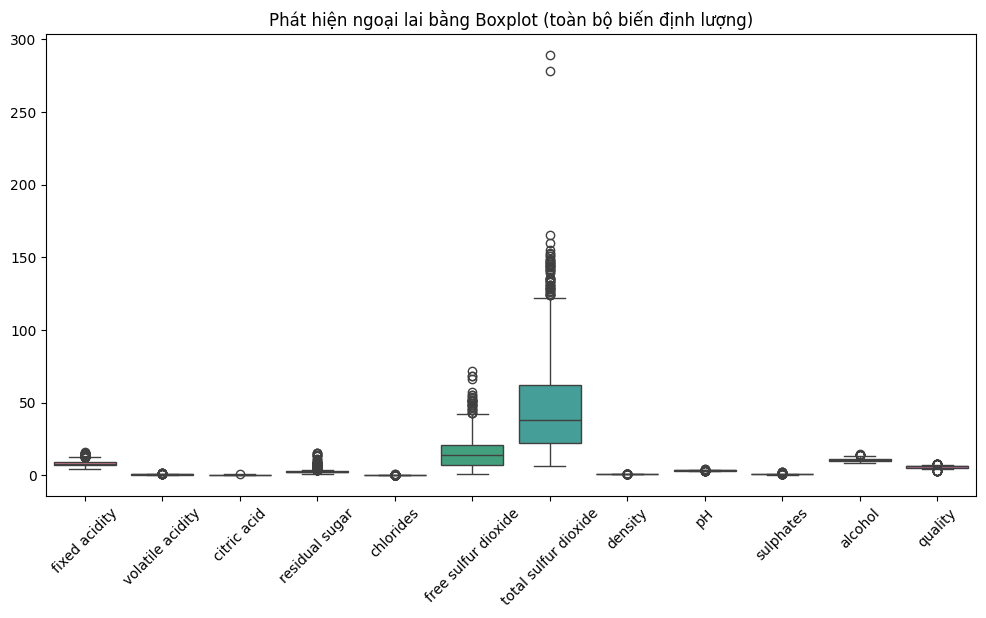

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Phát hiện ngoại lai bằng IQR ===
Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((wine_data < (Q1 - 1.5 * IQR)) | (wine_data > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum().sort_values(ascending=False)

print("* Số lượng giá trị ngoại lai theo từng biến:\n")
print(outlier_counts)

# === Trực quan hóa bằng Boxplot ===
plt.figure(figsize=(12,6))
sns.boxplot(data=wine_data)
plt.title("Phát hiện ngoại lai bằng Boxplot (toàn bộ biến định lượng)")
plt.xticks(rotation=45)
plt.show()


**5. Trực quan hóa dữ liệu**

**5.1 Histogram (Phân bố biến)**

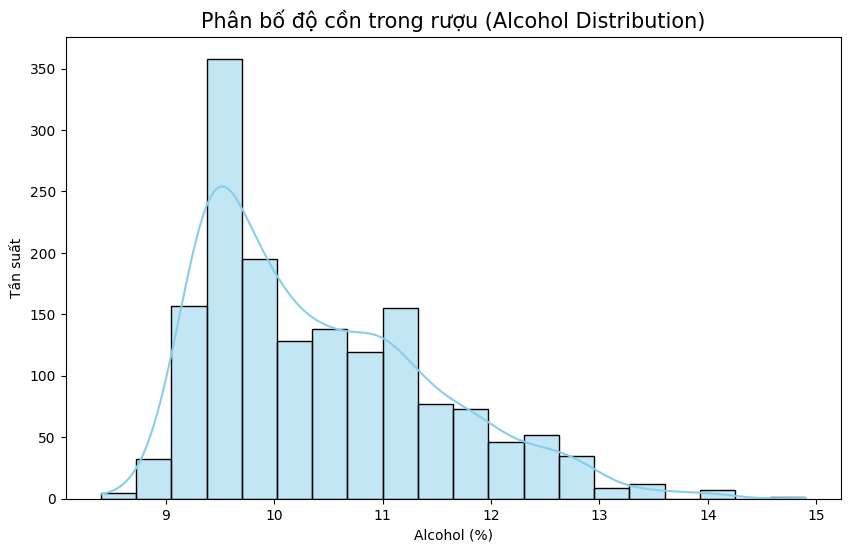

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(wine_data['alcohol'], bins=20, kde=True, color='skyblue')
plt.title('Phân bố độ cồn trong rượu (Alcohol Distribution)', fontsize=15)
plt.xlabel('Alcohol (%)')
plt.ylabel('Tần suất')
plt.show()


Biểu đồ Histogram cho thấy biến alcohol có phân bố lệch phải, phần lớn giá trị nằm trong khoảng 9–10.5%.

Đường cong mật độ cho thấy phân phối không đối xứng, phù hợp với kết quả thống kê mô tả (mean > median). Điều này cho thấy đa số rượu có độ cồn trung bình, còn các rượu mạnh ít xuất hiện nhưng có thể liên quan đến chất lượng cao hơn.

**5.2 Scatter plot (Mối quan hệ 2 biến)**

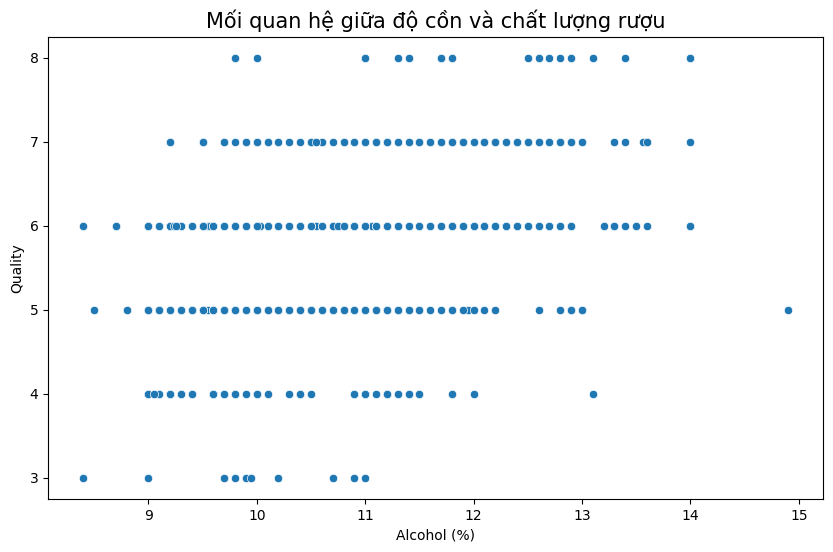

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='alcohol', y='quality', data=wine_data)
plt.title('Mối quan hệ giữa độ cồn và chất lượng rượu', fontsize=15)
plt.xlabel('Alcohol (%)')
plt.ylabel('Quality')
plt.show()


Khi độ cồn tăng, chất lượng rượu có xu hướng tăng → có một mối tương quan dương nhẹ.

Các rượu có độ cồn thấp (dưới 10%) chủ yếu có chất lượng từ 3–6.

Các rượu có độ cồn cao hơn (12–14%) có nhiều điểm ở mức chất lượng 6–8.

Điều này phù hợp với hiểu biết thực tế: rượu có độ cồn cao thường được đánh giá chất lượng tốt hơn do quá trình lên men và cấu trúc hương vị.

**5.3 Heatmap (Ma trận tương quan)**

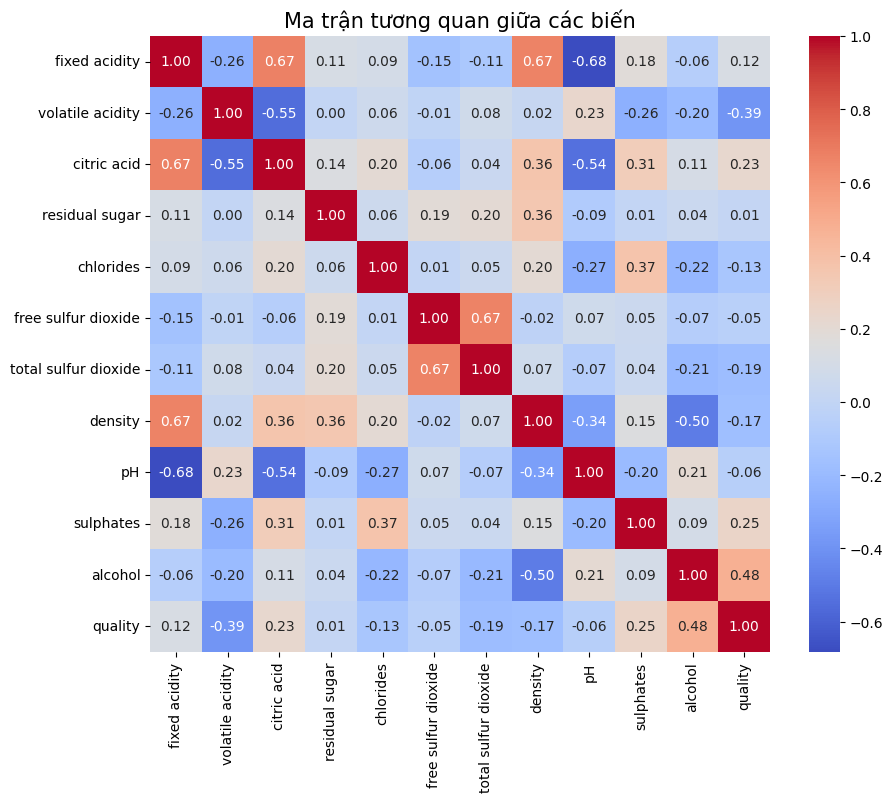

In [ ]:
plt.figure(figsize=(10,8))
corr = wine_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa các biến', fontsize=15)
plt.show()


🔹 Các cặp tương quan mạnh nhất

fixed acidity ↔ citric acid (0.67): liên hệ dương mạnh → axit cố định và axit citric thường tăng cùng nhau.

free sulfur dioxide ↔ total sulfur dioxide (0.67): hợp lý, vì tổng SO₂ bao gồm cả phần tự do.

density ↔ fixed acidity (0.67) và density ↔ alcohol (-0.50): cho thấy độ cồn cao thì mật độ thấp hơn (vì ethanol nhẹ hơn nước).

🔹 Các mối tương quan liên quan đến chất lượng (quality)

alcohol (0.48): tương quan dương khá rõ → rượu có độ cồn cao thường được đánh giá chất lượng cao hơn.

volatile acidity (-0.39): tương quan âm → độ chua dễ bay hơi cao làm giảm chất lượng rượu.

sulphates (0.25): tương quan dương nhẹ → lượng sunfat hợp lý có thể giúp bảo quản và ổn định hương vị.

Các biến khác như density, chlorides, pH, total sulfur dioxide có tương quan yếu hoặc gần 0 với quality.

🔹Kết luận:
→ Ba yếu tố ảnh hưởng nhiều nhất đến chất lượng rượu vang đỏ:

Alcohol (độ cồn) – tác động tích cực mạnh nhất,

Volatile acidity (axit dễ bay hơi) – tác động tiêu cực mạnh nhất,

Sulphates (sunfat) – tác động dương nhẹ.

**6. Phân tích đơn biến (Univariate Analysis)**

**6.1 Histogram nâng cao**

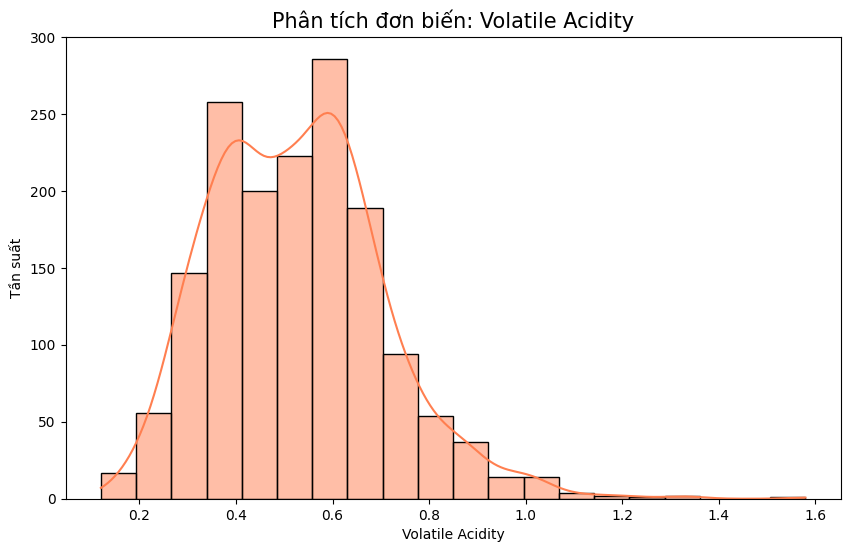

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.histplot(wine_data['volatile acidity'], bins=20, kde=True, color='coral')
ax.set_xlabel('Volatile Acidity')
ax.set_ylabel('Tần suất')
ax.set_title('Phân tích đơn biến: Volatile Acidity', fontsize=15)
plt.show()


Biểu đồ có dạng lệch phải (right-skewed), phần lớn các mẫu có độ chua dễ bay hơi nằm trong khoảng 0.3 – 0.7, còn các giá trị cao hơn (0.8 trở lên) ít gặp hơn.

Điều này cho thấy đa số rượu vang đỏ có độ chua dễ bay hơi ở mức trung bình, nhưng vẫn có một số ít mẫu có độ chua cao bất thường (có thể ảnh hưởng tiêu cực đến chất lượng).

Volatile acidity cao → tạo mùi giấm hoặc cay gắt → thường làm giảm chất lượng.

Kết hợp với heatmap trước đó (corr = -0.39 với quality), điều này xác nhận rõ hơn mối quan hệ âm giữa hai biến.


**6.2 Bar chart**

/tmp/ipython-input-3237590182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data, palette='pastel')


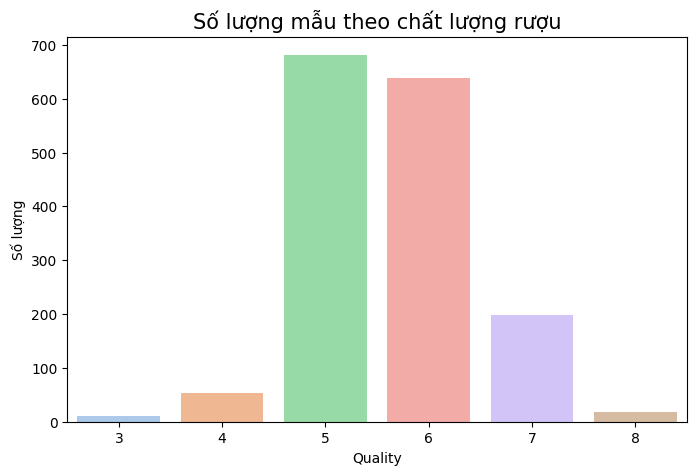

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=wine_data, palette='pastel')
plt.title('Số lượng mẫu theo chất lượng rượu', fontsize=15)
plt.xlabel('Quality')
plt.ylabel('Số lượng')
plt.show()


Mức chất lượng 5 và 6 chiếm đa số, với khoảng 650–700 mẫu mỗi mức.

Các mức 3, 4, 7, 8 có số lượng rất ít, đặc biệt là 3 và 8 chỉ vài chục mẫu.

Không có mẫu nào ở mức 9 hoặc 10, tức là không có rượu “rất cao cấp” trong tập dữ liệu này.

=> Dữ liệu không cân bằng — tập trung mạnh vào mức trung bình (5–6). Khi huấn luyện mô hình dự đoán chất lượng, cần chú ý xử lý mất cân bằng nhãn.


**6.3 Pie chart**

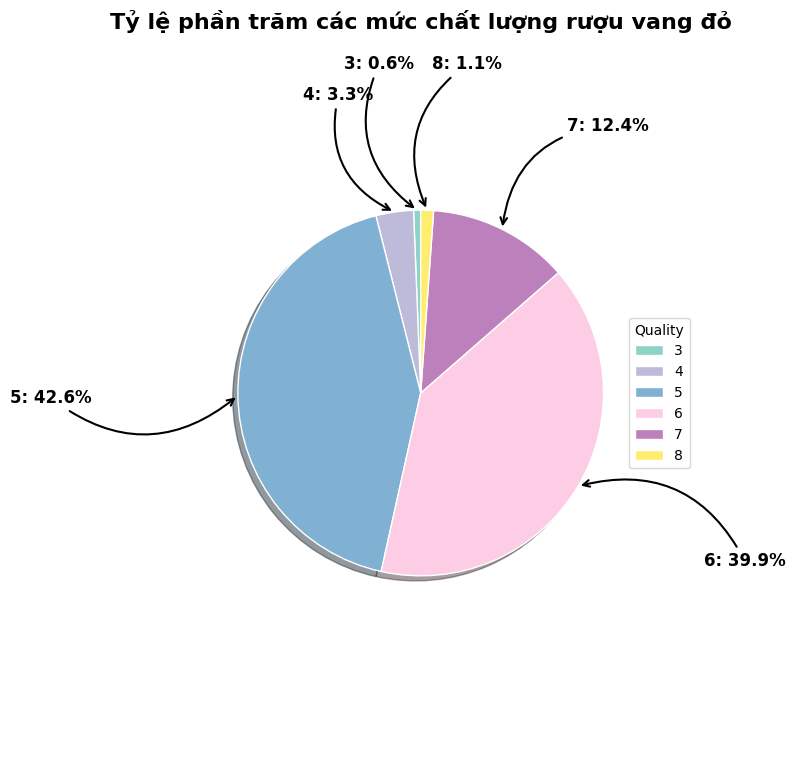

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đếm số lượng từng mức chất lượng
quality_counts = wine_data['quality'].value_counts().sort_index()
percentages = quality_counts / quality_counts.sum() * 100

# 🎨 Màu sắc khác nhau rõ rệt (Set3 có 12 màu pastel)
colors = plt.cm.Set3(np.linspace(0, 1, len(quality_counts)))

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(10, 10))
wedges, _ = ax.pie(
    quality_counts,
    startangle=90,
    colors=colors,
    wedgeprops=dict(edgecolor='white'),
    shadow=True
)

# Danh sách lưu vị trí nhãn đã dùng để tránh trùng
used_positions = []

def find_clear_position(y_target, used_positions, min_dist=0.15):
    """Dịch vị trí nhãn nếu bị gần nhãn khác"""
    for y_prev in used_positions:
        if abs(y_target - y_prev) < min_dist:
            y_target += min_dist * np.sign(y_target - y_prev or 1)
    used_positions.append(y_target)
    return y_target

# Thêm nhãn và mũi tên
for i, (p, pct) in enumerate(zip(wedges, percentages)):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))

    # Tính vị trí text xa hơn
    r_text = 1.8
    x_text = r_text * x
    y_text = find_clear_position(r_text * y, used_positions)

    ha = 'left' if x > 0 else 'right'

    ax.annotate(
        f"{quality_counts.index[i]}: {pct:.1f}%",
        xy=(x, y),
        xytext=(x_text, y_text),
        ha=ha,
        va='center',
        fontsize=12,
        weight='bold',
        arrowprops=dict(
            arrowstyle="->",
            lw=1.5,
            color='black',
            connectionstyle="arc3,rad=0.4"
        )
    )

# Tiêu đề
plt.title("Tỷ lệ phần trăm các mức chất lượng rượu vang đỏ", fontsize=16, fontweight="bold")

# Hiển thị chú thích
plt.legend(quality_counts.index, title="Quality", loc="center left", bbox_to_anchor=(1, 0, 0.3, 1))

# Cân đối biểu đồ
plt.axis("equal")
plt.tight_layout()
plt.show()


Chất lượng 5: chiếm 42.6%

Chất lượng 6: chiếm 39.9%
→ Hai mức này cộng lại chiếm hơn 80% tổng số mẫu, cho thấy phần lớn rượu vang đỏ được đánh giá ở mức trung bình.

Chất lượng 7: chỉ 12.4%.

Chất lượng 4: khoảng 3,3%.

Chất lượng 3 và 8: cực kỳ ít.

**7. Phân tích hai biến (Bivariate Analysis)**

**7.1 Scatter plot nâng cao**

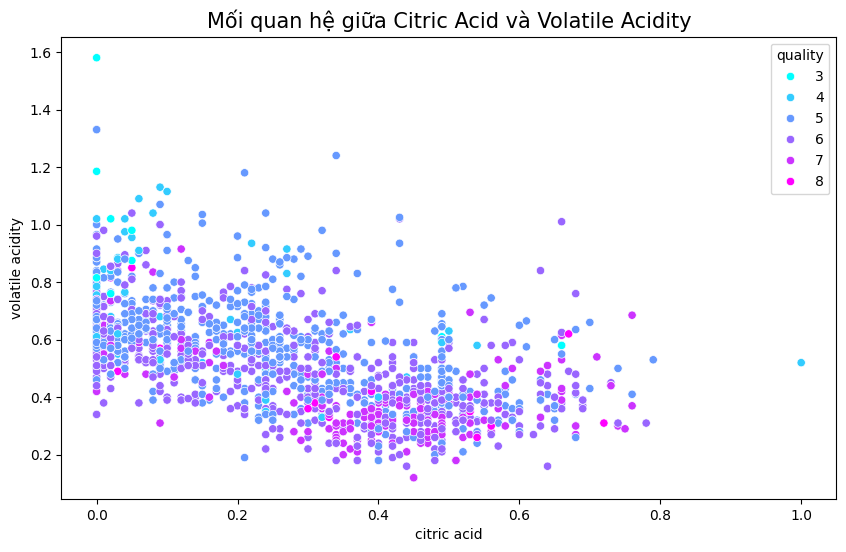

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=wine_data, x='citric acid', y='volatile acidity', hue='quality', palette='cool')
plt.title('Mối quan hệ giữa Citric Acid và Volatile Acidity', fontsize=15)
plt.show()


Có mối quan hệ nghịch khá rõ giữa citric acid và volatile acidity. Khi citric acid tăng, thì volatile acidity giảm. Điều này phù hợp với heatmap tương quan trước đó (r = -0.55).

Nhìn vào màu sắc: Các điểm có chất lượng cao hơn (7–8) thường nằm ở vùng citric acid cao và volatile acidity thấp. Các điểm chất lượng thấp (3–4) lại tập trung ở vùng citric acid thấp và volatile acidity cao.

=> Kết luận: Rượu chất lượng cao có xu hướng:

Axit citric cao hơn (tạo vị tươi, cân bằng vị chua).

Độ chua dễ bay hơi thấp hơn (ít mùi giấm, vị dịu hơn).


**7.2 Boxplot theo nhóm**

/tmp/ipython-input-1604056367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=wine_data, palette='Set3')


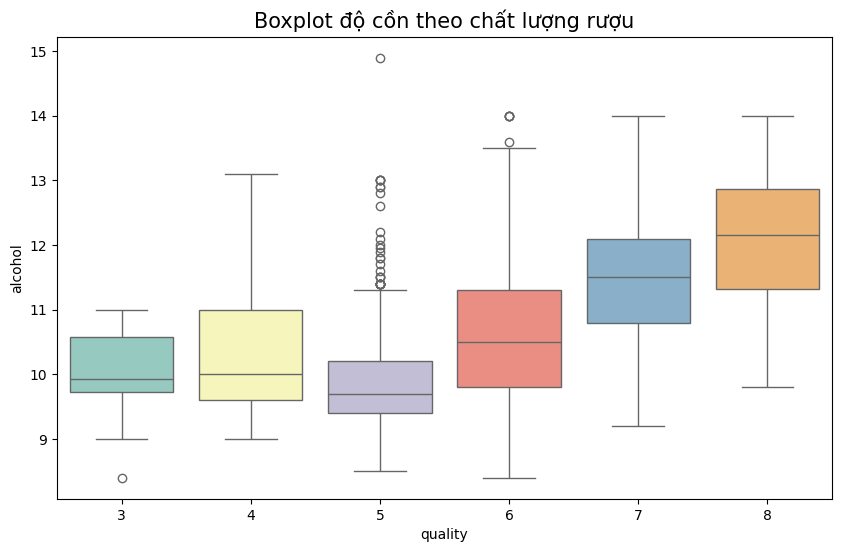

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='quality', y='alcohol', data=wine_data, palette='Set3')
plt.title('Boxplot độ cồn theo chất lượng rượu', fontsize=15)
plt.show()


Có xu hướng tăng rõ rệt: Khi chất lượng rượu (quality) tăng, thì độ cồn (alcohol) cũng tăng dần. Rượu chất lượng thấp (3–5) có độ cồn trung bình khoảng 9.5–10.5%. Rượu chất lượng cao (7–8) có độ cồn trung bình 11.5–12.5%, và phân bố lệch về phía cao.

Một số outlier (dấu tròn nhỏ) thể hiện các mẫu có độ cồn cao bất thường so với nhóm.

=> Kết luận: Độ cồn là một yếu tố quan trọng ảnh hưởng tích cực đến chất lượng rượu. Điều này hoàn toàn phù hợp với kết quả của heatmap tương quan (r = 0.48 giữa alcohol và quality).


**7.3 Pairplot (quan hệ tổng thể)**

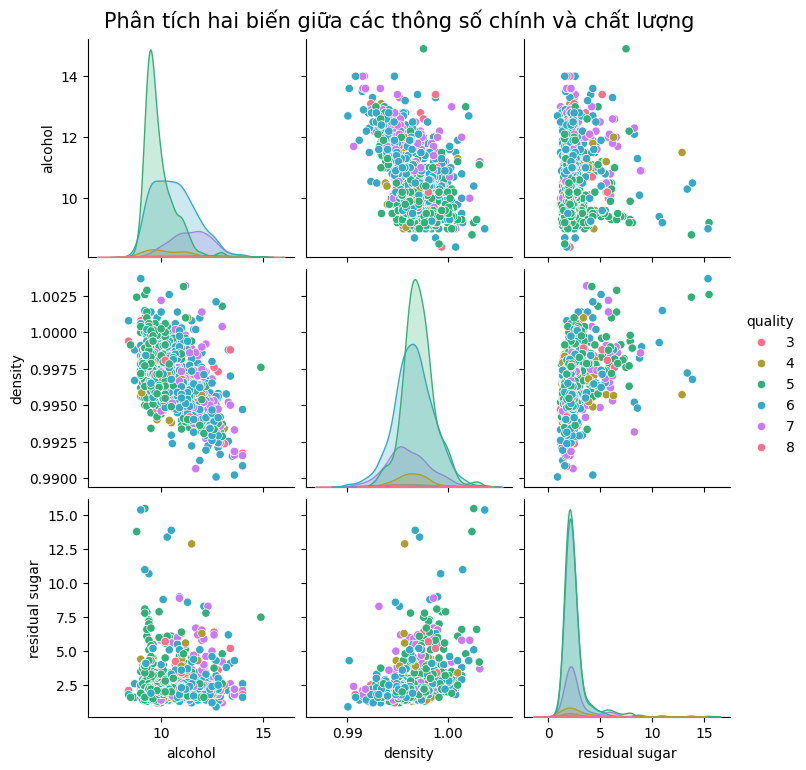

In [ ]:
sns.pairplot(wine_data[['alcohol', 'density', 'residual sugar', 'quality']], hue='quality', palette='husl')
plt.suptitle('Phân tích hai biến giữa các thông số chính và chất lượng', y=1.02, fontsize=15)
plt.show()


a/ Mối quan hệ giữa Alcohol và Density
Giữa độ cồn và tỷ trọng tồn tại mối quan hệ nghịch khá rõ ràng: khi độ cồn tăng, mật độ rượu giảm.

Điều này hoàn toàn phù hợp về mặt vật lý học, bởi ethanol có khối lượng riêng thấp hơn nước, nên khi hàm lượng ethanol trong rượu tăng, mật độ tổng thể của dung dịch sẽ giảm.

Quan sát theo màu sắc trên biểu đồ, có thể nhận thấy rằng các mẫu rượu chất lượng cao (điểm 7–8) thường có độ cồn cao và mật độ thấp, trong khi rượu chất lượng thấp (điểm 3–5) thể hiện xu hướng ngược lại.

=> Từ đó, có thể xem cặp biến Alcohol – Density là một trong những yếu tố quan trọng nhất ảnh hưởng đến chất lượng rượu vang đỏ.

b) Mối quan hệ giữa Alcohol và Residual Sugar
Giữa hai biến này không tồn tại mối tương quan mạnh, tuy nhiên vẫn có một số khuynh hướng đáng chú ý.

Phần lớn các mẫu rượu có đường dư thấp (Residual Sugar < 3) và độ cồn cao hơn thường được đánh giá chất lượng cao hơn (thể hiện qua màu sắc nhạt hơn – tím, hồng).

Điều này cho thấy độ ngọt không phải là yếu tố quyết định chất lượng trong loại rượu vang đỏ này, mà cấu trúc cồn và độ cân bằng vị chua – chát có thể đóng vai trò quan trọng hơn.

c) Mối quan hệ giữa Density và Residual Sugar
Hai biến này thể hiện mối tương quan dương nhẹ: khi lượng đường dư tăng, mật độ rượu cũng có xu hướng tăng.

Hiện tượng này cũng phù hợp với nguyên lý vật lý, bởi đường làm tăng khối lượng riêng của dung dịch.

Tuy nhiên, sự khác biệt về chất lượng rượu giữa các mức đường dư khác nhau không quá rõ ràng, cho thấy đường dư chỉ tác động gián tiếp đến chất lượng thông qua ảnh hưởng đến mật độ và độ cồn.
